In [11]:
import pandas as pd

# Korrekter Pfad aus dem notebooks-Ordner
df = pd.read_csv("../data/processed/co2_energy_data.csv")

# Ersten Blick auf die Daten werfen
df.head()

# Überblick über Spalten, Datentypen und fehlende Werte
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12862 entries, 0 to 12861
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    12862 non-null  object 
 1   ISO3                       12862 non-null  object 
 2   Year                       12862 non-null  int64  
 3   Population                 12744 non-null  float64
 4   GDP                        9343 non-null   float64
 5   CO2_total                  12173 non-null  float64
 6   CO2_per_capita             12102 non-null  float64
 7   CO2_coal                   8207 non-null   float64
 8   CO2_oil                    12093 non-null  float64
 9   CO2_gas                    6365 non-null   float64
 10  CO2_cement                 11816 non-null  float64
 11  CO2_flaring                7770 non-null   float64
 12  CO2_other                  1405 non-null   float64
 13  Primary_energy             8673 non-null   flo

In [7]:
# Form und Spalten prüfen
print("Form der Daten:", df.shape)
print("Spaltenübersicht:", df.columns.tolist())

# Statistische Übersicht
df.describe(include='all')


Form der Daten: (12862, 20)
Spaltenübersicht: ['Country', 'ISO3', 'Year', 'Population', 'GDP', 'CO2_total', 'CO2_per_capita', 'CO2_coal', 'CO2_oil', 'CO2_gas', 'CO2_cement', 'CO2_flaring', 'CO2_other', 'Primary_energy', 'Energy_per_capita', 'Energy_intensity', 'CO2_intensity', 'CO2_per_energy', 'CO2_intensity_luc', 'CO2_intensity_consumption']


,Country,ISO3,Year,Population,GDP,CO2_total,CO2_per_capita,CO2_coal,CO2_oil,CO2_gas,CO2_cement,CO2_flaring,CO2_other,Primary_energy,Energy_per_capita,Energy_intensity,CO2_intensity,CO2_per_energy,CO2_intensity_luc,CO2_intensity_consumption
count,12862,12862,12862.000000,1.274400e+04,9.343000e+03,12173.000000,12102.000000,8207.000000,12093.000000,6365.000000,11816.000000,7770.000000,1405.000000,8673.000000,8634.000000,7112.000000,9231.000000,8580.000000,9113.000000,3429.000000
unique,218,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1989.000000,2.434708e+07,3.131159e+11,106.059640,5.322128,63.753412,39.923515,34.755116,3.247400,2.167852,6.129211,589.358992,24309.618321,1.809581,0.386271,0.231220,1.216390,0.362976
std,NaN,NaN,17.030048,1.018946e+08,1.175574e+12,512.499997,12.651802,344.322575,173.157296,125.493515,24.836941,6.550464,17.818740,2404.597315,32526.735918,1.767435,0.940792,0.206095,2.324665,0.278251
min,NaN,NaN,1960.000000,5.520000e+02,7.056000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.003000,0.000000,-6.469000,0.000000
25%,NaN,NaN,1974.000000,4.560102e+05,1.005594e+10,0.566000,0.462250,0.025000,0.502000,0.245000,0.000000,0.000000,0.477000,5.683000,2730.940000,0.862000,0.145000,0.172000,0.308000,0.204000
50%,NaN,NaN,1989.000000,4.234795e+06,3.577013e+10,5.164000,2.118500,1.260000,2.935000,3.701000,0.185000,0.000000,1.175000,50.250000,11812.284000,1.319000,0.260000,0.214000,0.580000,0.302000
75%,NaN,NaN,2004.000000,1.349464e+07,1.660596e+11,42.162000,6.747750,14.886000,19.751000,19.671000,1.319250,1.092000,4.257000,300.531000,34347.150500,2.206000,0.461000,0.256000,1.297000,0.439000


Year
1960     9148.842
1961     9151.729
1962     9474.273
1963     9980.952
1964    10511.341
Name: CO2_total, dtype: float64


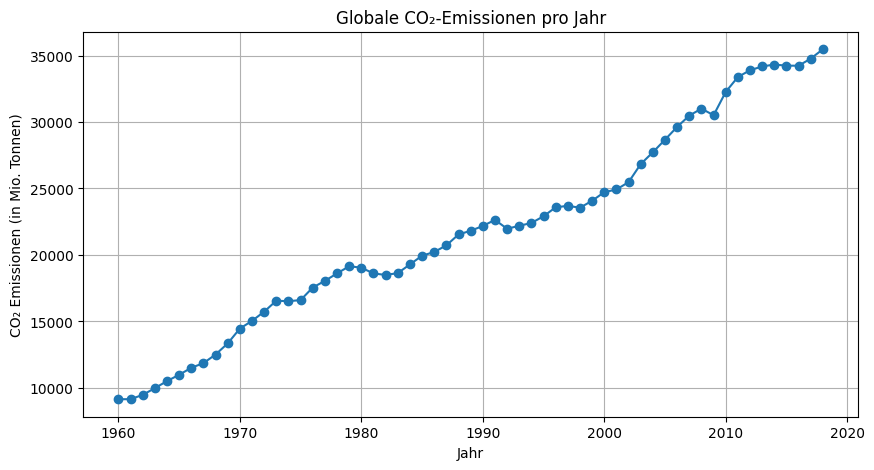


Hier analysieren wir die weltweiten CO₂-Emissionen über die Jahre hinweg.
Dazu gruppieren wir die Daten nach Jahr und summieren die Emissionen.
So erkennen wir globale Trends – z. B. ob sie steigen oder sinken.



In [15]:


yearly_emissions = df.groupby("Year")["CO2_total"].sum()

print(yearly_emissions.head())

plt.figure(figsize=(10, 5))
plt.plot(yearly_emissions.index, yearly_emissions.values, marker='o')
plt.title("Globale CO₂-Emissionen pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("CO₂ Emissionen (in Mio. Tonnen)")
plt.grid(True)
plt.show()

print("""
Hier analysieren wir die weltweiten CO₂-Emissionen über die Jahre hinweg.
Dazu gruppieren wir die Daten nach Jahr und summieren die Emissionen.
So erkennen wir globale Trends – z. B. ob sie steigen oder sinken.
""")

             Country  CO2_total
2477           China  10332.992
12271  United States   5377.797
5368           India   2593.058
9498          Russia   1712.494
5840           Japan   1142.481
4542         Germany    760.046
5486            Iran    689.783
10796    South Korea    670.169
10088   Saudi Arabia    637.487
5427       Indonesia    594.101


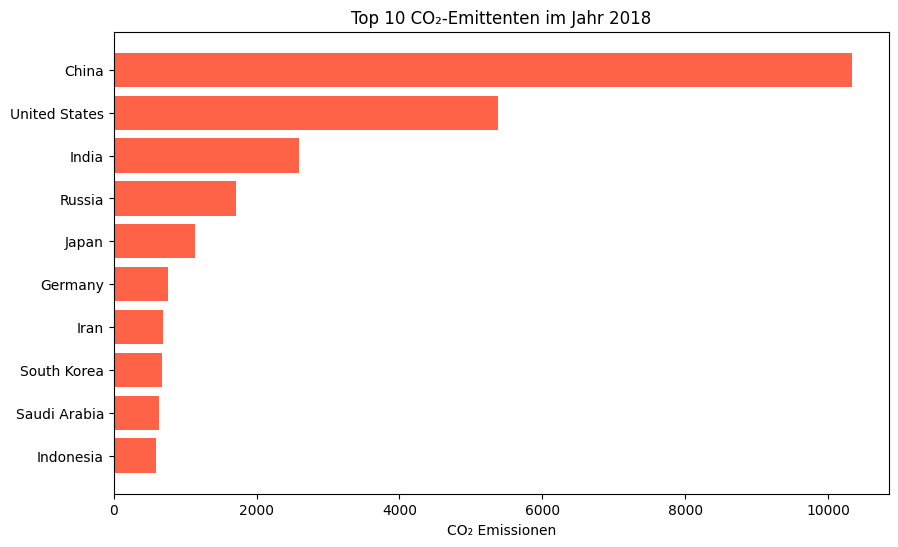


Wir zeigen die 10 Länder mit den höchsten CO₂-Emissionen im neuesten Jahr des Datensatzes.
Dies gibt Aufschluss darüber, wer heute die Hauptverursacher sind.



In [16]:

latest_year = df["Year"].max()
top_countries = df[df["Year"] == latest_year].nlargest(10, "CO2_total")[["Country", "CO2_total"]]
print(top_countries)

plt.figure(figsize=(10, 6))
plt.barh(top_countries["Country"], top_countries["CO2_total"], color="tomato")
plt.xlabel("CO₂ Emissionen")
plt.title(f"Top 10 CO₂-Emittenten im Jahr {latest_year}")
plt.gca().invert_yaxis()
plt.show()

print("""
Wir zeigen die 10 Länder mit den höchsten CO₂-Emissionen im neuesten Jahr des Datensatzes.
Dies gibt Aufschluss darüber, wer heute die Hauptverursacher sind.
""")



Korrelationsmatrix:
                   CO2_total  Primary_energy  Energy_per_capita       GDP
CO2_total           1.000000        0.988441           0.165377  0.937894
Primary_energy      0.988441        1.000000           0.202203  0.953551
Energy_per_capita   0.165377        0.202203           1.000000  0.159664
GDP                 0.937894        0.953551           0.159664  1.000000


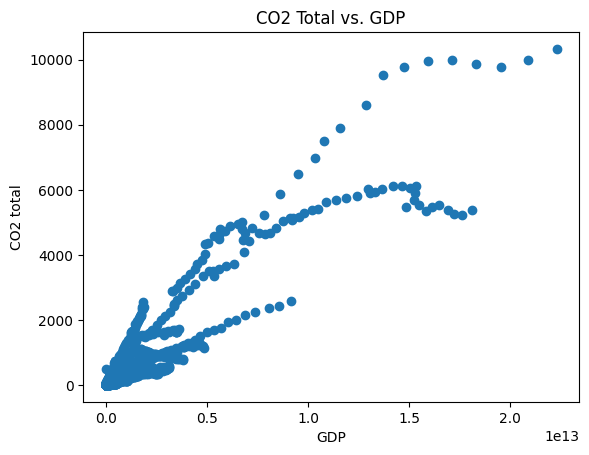


Hier prüfen wir, wie stark CO₂-Emissionen mit Energieverbrauch und Wirtschaftskraft (BIP) zusammenhängen.
Eine hohe Korrelation kann auf wirtschaftliche Ursachen der Emissionen hinweisen.



In [20]:
# Korrelation berechnen (ohne seaborn)
numeric = df[["CO2_total", "Primary_energy", "Energy_per_capita", "GDP"]].dropna()
print("Korrelationsmatrix:")
print(numeric.corr())

# Einfacher Scatterplot mit matplotlib
plt.scatter(df["GDP"], df["CO2_total"])
plt.xlabel("GDP")
plt.ylabel("CO2 total")
plt.title("CO2 Total vs. GDP")
plt.show()

print("""
Hier prüfen wir, wie stark CO₂-Emissionen mit Energieverbrauch und Wirtschaftskraft (BIP) zusammenhängen.
Eine hohe Korrelation kann auf wirtschaftliche Ursachen der Emissionen hinweisen.
""")


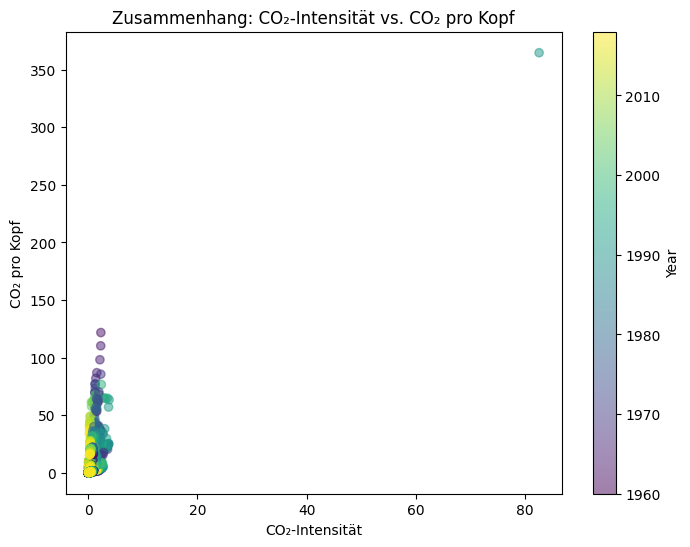

Hier visualisieren wir den Zusammenhang zwischen CO₂-Intensität und CO₂ pro Kopf.
Das hilft zu verstehen, ob Länder mit ineffizientem Energiesystem automatisch auch mehr Emissionen pro Person verursachen.



In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatterplot mit matplotlib, Farben nach Jahr (Year)
# Wir nutzen eine colormap von matplotlib für die Farbgebung

years = df["Year"]
scatter = plt.scatter(df["CO2_intensity"], df["CO2_per_capita"], c=years, cmap='viridis', alpha=0.5)

plt.colorbar(scatter, label='Year')  # Farbskala für Jahre
plt.title("Zusammenhang: CO₂-Intensität vs. CO₂ pro Kopf")
plt.xlabel("CO₂-Intensität")
plt.ylabel("CO₂ pro Kopf")
plt.show()

print("""Hier visualisieren wir den Zusammenhang zwischen CO₂-Intensität und CO₂ pro Kopf.
Das hilft zu verstehen, ob Länder mit ineffizientem Energiesystem automatisch auch mehr Emissionen pro Person verursachen.
""")
